# Dependências

In [2]:
from load_mnist import load_data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

from objectivefunc import model_function, other_params_model
import optuna

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Modelo Inicial

In [3]:
learning_rate = 0.001
epochs = 5
num_classes = 10

In [4]:
training_data, validation_data, test_data = load_data()
training_data = list(training_data)
test_data = list(test_data)

In [6]:
X_train, X_test, y_train, y_test = training_data[0], test_data[0], training_data[1], test_data[1]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [41]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),  
  tf.keras.layers.Dense(units=num_classes, activation='relu'),
  tf.keras.layers.Dense(units=num_classes, activation='softmax') 
])

model.compile(loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy'])


In [42]:
model.fit(X_train, y_train, epochs=epochs)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7599 - loss: 0.7610
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9585 - loss: 0.1325
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9702 - loss: 0.0917
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0699
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9795 - loss: 0.0643


In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0708
Test Accuracy: 0.9811999797821045


In [44]:
predictions = model.predict(X_test)

predicted_labels = predictions.argmax(axis=1)

cm = confusion_matrix(y_test, predicted_labels)

for i in range(num_classes):
  accuracy = cm[i, i] / cm[i, :].sum()
  print(f"Accuracy for class {i}: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy for class 0: 0.9929
Accuracy for class 1: 0.9921
Accuracy for class 2: 0.9835
Accuracy for class 3: 0.9733
Accuracy for class 4: 0.9786
Accuracy for class 5: 0.9809
Accuracy for class 6: 0.9864
Accuracy for class 7: 0.9805
Accuracy for class 8: 0.9743
Accuracy for class 9: 0.9683


In [45]:
predicted_labels = predictions.argmax(axis=1)

report = classification_report(y_test, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



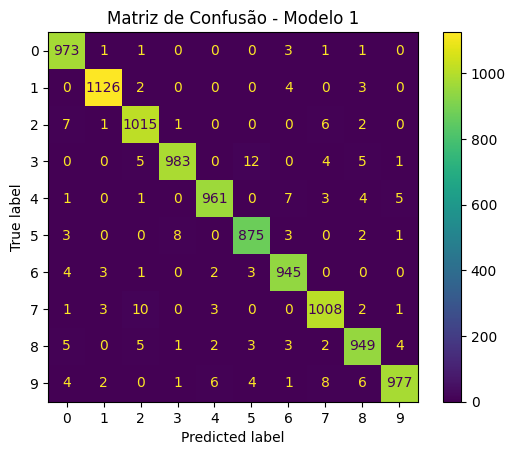

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão - Modelo 1')
plt.show()


# Otimização de parâmetros com Optuna

#### Estudo 1: Learning Rate, Epochs, Batch Size, No. of filters, Dense Units

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(other_params_model, n_trials=10)

[I 2024-05-20 23:14:39,412] A new study created in memory with name: no-name-68045c57-fcb9-45a7-81b9-86ae609308b0
[I 2024-05-20 23:16:03,898] Trial 0 finished with value: 0.9851999878883362 and parameters: {'learning_rate': 0.007949254734482034, 'epochs': 8, 'batch_size': 106, 'num_filters': 32, 'dense_units': 196}. Best is trial 0 with value: 0.9851999878883362.
[I 2024-05-20 23:32:30,732] Trial 1 finished with value: 0.9907000064849854 and parameters: {'learning_rate': 0.0011090093878667155, 'epochs': 14, 'batch_size': 44, 'num_filters': 128, 'dense_units': 167}. Best is trial 1 with value: 0.9907000064849854.
[I 2024-05-20 23:42:06,683] Trial 2 finished with value: 0.9901999831199646 and parameters: {'learning_rate': 0.00034388105147047066, 'epochs': 9, 'batch_size': 57, 'num_filters': 128, 'dense_units': 73}. Best is trial 1 with value: 0.9907000064849854.
[I 2024-05-20 23:43:57,753] Trial 3 finished with value: 0.9793999791145325 and parameters: {'learning_rate': 9.426207367184762

In [ ]:
for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  - Parameters: {trial.params}")
    print(f"  - Metric value: {trial.value}\n")


Trial 0:
  - Parameters: {'learning_rate': 0.007949254734482034, 'epochs': 8, 'batch_size': 106, 'num_filters': 32, 'dense_units': 196}
  - Metric value: 0.9851999878883362

Trial 1:
  - Parameters: {'learning_rate': 0.0011090093878667155, 'epochs': 14, 'batch_size': 44, 'num_filters': 128, 'dense_units': 167}
  - Metric value: 0.9907000064849854

Trial 2:
  - Parameters: {'learning_rate': 0.00034388105147047066, 'epochs': 9, 'batch_size': 57, 'num_filters': 128, 'dense_units': 73}
  - Metric value: 0.9901999831199646

Trial 3:
  - Parameters: {'learning_rate': 9.426207367184762e-05, 'epochs': 5, 'batch_size': 88, 'num_filters': 64, 'dense_units': 118}
  - Metric value: 0.9793999791145325

Trial 4:
  - Parameters: {'learning_rate': 0.002818643058613451, 'epochs': 7, 'batch_size': 71, 'num_filters': 32, 'dense_units': 163}
  - Metric value: 0.9873999953269958

Trial 5:
  - Parameters: {'learning_rate': 1.9200968516406505e-05, 'epochs': 15, 'batch_size': 91, 'num_filters': 64, 'dense_uni

#### Estudo 2: No. of filters, Filter size, Padding, Dropout Rate, Pool size

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(model_function, n_trials=10)

[I 2024-05-21 13:20:37,117] A new study created in memory with name: no-name-9fed91ce-0f71-4911-afe7-a33ab898e959
[I 2024-05-21 13:21:36,580] Trial 0 finished with value: 0.9804999828338623 and parameters: {'num_filters': 64, 'filter_size': 3, 'stride': 2, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 2}. Best is trial 0 with value: 0.9804999828338623.
[I 2024-05-21 13:28:05,435] Trial 1 finished with value: 0.9864000082015991 and parameters: {'num_filters': 128, 'filter_size': 5, 'stride': 2, 'padding': 'same', 'dropout_rate': 0.1, 'pool_size': 3}. Best is trial 1 with value: 0.9864000082015991.
[I 2024-05-21 13:29:37,513] Trial 2 finished with value: 0.9904000163078308 and parameters: {'num_filters': 32, 'filter_size': 5, 'stride': 1, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 3}. Best is trial 2 with value: 0.9904000163078308.
[I 2024-05-21 13:53:54,913] Trial 3 finished with value: 0.9925000071525574 and parameters: {'num_filters': 128, 'filter_size': 5, 'stride'

In [ ]:
for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  - Parameters: {trial.params}")
    print(f"  - Metric value: {trial.value}\n")


Trial 0:
  - Parameters: {'num_filters': 64, 'filter_size': 3, 'stride': 2, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 2}
  - Metric value: 0.9804999828338623

Trial 1:
  - Parameters: {'num_filters': 128, 'filter_size': 5, 'stride': 2, 'padding': 'same', 'dropout_rate': 0.1, 'pool_size': 3}
  - Metric value: 0.9864000082015991

Trial 2:
  - Parameters: {'num_filters': 32, 'filter_size': 5, 'stride': 1, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 3}
  - Metric value: 0.9904000163078308

Trial 3:
  - Parameters: {'num_filters': 128, 'filter_size': 5, 'stride': 1, 'padding': 'same', 'dropout_rate': 0.30000000000000004, 'pool_size': 3}
  - Metric value: 0.9925000071525574

Trial 4:
  - Parameters: {'num_filters': 32, 'filter_size': 3, 'stride': 2, 'padding': 'same', 'dropout_rate': 0.4, 'pool_size': 3}
  - Metric value: 0.9843999743461609

Trial 5:
  - Parameters: {'num_filters': 32, 'filter_size': 3, 'stride': 1, 'padding': 'valid', 'dropout_rate': 0.4, 'pool_size': 